# Model K-means

This Jupyter notebook is used to:

1. Run PCA.
2. Run K-means.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.85685          0.77611              0.00005   
1            1.00000           0.85685          0.85504              0.00010   
2            1.00000           0.76639          0.16642              0.00010   
3            1.00000           0.76639          0.16704              0.00020   
4            1.00000           0.21599          0.54411              0.00020   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.94024                0.01245                   0.03605   
1            0.94096                0.00088                   0.01432   
2            0.92881                0.00690                   0.00880   
3            0.92891                0.01703                   0.02154   
4            0.93800                0.00872                   0.01401   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.03514            0.00215                0.00046  ...   
1               0.02432            0.00028                0.00006  ...   
2               0.00743            0.00695                0.00039  ...   
3               0.01824            0.00695                0.01428  ...   
4               0.01486            0.00695                0.01224  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol             service  \
0        4868                      32       tcp  smb,gssapi,dce_rpc   
1        1910                      28       tcp                 ftp   
2        1663                       6       tcp                 ssl   
3       51530                      41       tcp                 ssl   
4       43967                      31       tcp                 ssl   

   conn_state       orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0          SF  orig_reg_or_dyn  resp_well_known              No           Yes   
1          SF  orig_reg_or_dyn          resp_21              No           Yes   
2          SF  orig_reg_or_dyn         resp_443              No            No   
3          SF  orig_reg_or_dyn         resp_443              No            No   
4          SF  orig_reg_or_dyn         resp_443              No            No   

                     timestamp  
0  2017-07-04T18:08:16.759946Z  
1  2017-07-04T18:10:38.812648Z  
2  2017-07-04T17:49:59.530842Z  
3  2017-07-04T17:50:00.652192Z  
4  2017-07-04T18:01:19.250643Z  

[5 rows x 300 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.85685          0.29386              0.00001   
1            1.00000           0.85685          0.82781              0.00000   
2            1.00000           0.85685          0.60429              0.00003   
3            1.00000           0.85685          0.99137              0.00004   
4            1.00000           0.85685          0.60663              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.94082                0.00044                   0.00050   
1            0.97012                0.00080                   0.00094   
2            0.92499                0.00066                   0.00084   
3            0.94662                0.00054                   0.00057   
4            0.97772                0.00082                   0.00095   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00068            0.00079                0.00002  ...   
1               0.00135            0.00079                0.00008  ...   
2               0.00135            0.00079                0.00006  ...   
3               0.00068            0.00079                0.00003  ...   
4               0.00135            0.00079                0.00003  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0          88                       1       udp      dns          SF   
1         328                       2       udp      dns          SF   
2         260                       2       udp      dns          SF   
3         144                       1       udp      dns          SF   
4         170                       2       udp      dns          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn     resp_53              No            No   
1  orig_reg_or_dyn     resp_53              No            No   
2  orig_reg_or_dyn     resp_53              No            No   
3  orig_reg_or_dyn     resp_53              No            No   
4  orig_reg_or_dyn     resp_53              No            No   

                     timestamp  
0  2017-07-04T17:53:48.895322Z  
1  2017-07-04T18:09:49.808525Z  
2  2017-07-04T18:03:07.548658Z  
3  2017-07-04T18:14:44.168755Z  
4   2017-07-04T18:03:11.75962Z  

[5 rows x 300 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 18602 rows and 300 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        18602.00000       18602.00000      18602.00000   
mean             0.98908           0.72294          0.46017   
std              0.04104           0.24925          0.30926   
min              0.00000           0.00000          0.00000   
25%              1.00000           0.76639          0.16186   
50%              1.00000           0.85685          0.46168   
75%              1.00000           0.85685          0.70956   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          18602.00000        18602.00000            18602.00000   
mean               0.00851            0.75585                0.00683   
std                0.02620            0.26045                0.02077   
min                0.00000            0.00000                0.00000   
25%                0.00001            0.73217                0.00057   
50%                0.00004            0.85892                0.00084   
75%                0.00304            0.92930                0.00742   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               18602.00000           18602.00000        18602.00000   
mean                    0.00812               0.00648            0.00374   
std                     0.02381               0.02089            0.03002   
min                     0.00000               0.00000            0.00000   
25%                     0.00077               0.00135            0.00079   
50%                     0.00100               0.00135            0.00079   
75%                     0.00957               0.00811            0.00212   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            18602.00000               18602.00000           18602.00000   
mean                 0.00246                   0.00257               0.00544   
std                  0.02120                   0.02132               0.02097   
min                  0.00000                   0.00000               0.00000   
25%                  0.00003                   0.00005               0.00096   
50%                  0.00006                   0.00008               0.00096   
75%                  0.00079                   0.00114               0.00481   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 18602.00000 18602.00000 18602.00000 18602.00000  18602.00000   
mean      0.56107     0.07112     0.06687     0.20433      0.01588   
std       0.49627     0.25703     0.24981     0.40322      0.04209   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      18602.00000                     18602.00000   
mean           0.42960                         0.45711   
std            0.27657                         0.30954   
min            0.00000                         0.00000   
25%            0.19492                         0.16488   
50%            0.34355                         0.44667   
75%            0.64537                         0.72705   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         18602.00000   
mean                              0.24039   
std                               0.18992   
min                               0.00000   
25%  

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.29386              0.00001            0.94082   
1          0.82781              0.00000            0.97012   
2          0.60429              0.00003            0.92499   
3          0.99137              0.00004            0.94662   
4          0.60663              0.00000            0.97772   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00044               0.00068            0.00079   
1                0.00080               0.00135            0.00079   
2                0.00066               0.00135            0.00079   
3                0.00054               0.00068            0.00079   
4                0.00082               0.00135            0.00079   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00002               0.00048    1.00000    0.00000   
1                0.00008               0.00096    1.00000    0.00000   
2                0.00006               0.00096    1.00000    0.00000   
3                0.00003               0.00048    1.00000    0.00000   
4                0.00003               0.00096    1.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    0.00000      0.00000                           1   
1     0.00000    0.00000      0.00000                           1   
2     0.00000    0.00000      0.00000                           1   
3     0.00000    0.00000      0.00000                           1   
4     0.00000    0.00000      0.00000                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    0                   1   
1                   0                    0                   1   
2                   0                    0                   1   
3                   0                    0                   1   
4                   0                    0                   1   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_icmp  connection.proto_tcp  \
0                           0                      0                     0   
1                           0                      0                     0   
2                           0                      0                     0   
3                           0                      0                     0   
4                           0                      0                     0   

   connection.proto_udp  connection.service_dce_rpc  connection.service_dns  \
0                     1                           0                       1   
1                     1                           0                       1   
2                     1                           0                       1   
3                     1                           0                       1   
4                     1                           0                       1   

   connection.service_ftp  connection.service_ftp-data  \
0                       0                            0   
1                       0                            0   
2   

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_RSTRH',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S3',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mode_SH',
       'resp_resp_connection.conn_state_mode_SHR'],
      dtype='object', length=269)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 269 principal components: 1.0000000000000002


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999979]
Variance Captured by First  10 Principal Components: [0.92212656]
Variance Captured by First   7 Principal Components: [0.89097367]
Variance Captured by First   5 Principal Components: [0.85630062]
Variance Captured by First   2 Principal Components: [0.75971098]
Variance Captured by the First Principal Component:  [0.6113985]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.34286743
Variance of connection.duration                       : 0.26853107
Variance of connection.orig_p                         : 0.09378037
Variance of connection.orig_bytes                     : 0.05453212
Variance of connection.orig_pkts                      : 0.03924092
Variance of connection.resp_p                         : 0.03243894
Variance of connection.resp_bytes                     : 0.02490978
Variance of connection.resp_pkts                      : 0.01886732
Variance of dns_count                                 : 0.01580573
Variance of ssh_count                                 : 0.01317202
Variance of http_count                                : 0.01098580
Variance of ssl_count                                 : 0.00699507
Variance of files_count                               : 0.00610466
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00531930
Variance of orig_p_cat_orig_well_known                : 0.0047

## 2. K-means

In [16]:
from datetime import datetime
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
from sklearn.cluster import KMeans

# Choose optimal K using Elbow method
score = []
inertia = []
print_info = []
computed_clusters = []
computed_clusters_fitted = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
for cluster in range(1, 25):
    try:
        km = KMeans(
            n_clusters=cluster, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0
        )
        km_fitted = km.fit(pca_X)
        y_km = km.fit_predict(pca_X)
        computed_clusters.append(km)
        computed_clusters_fitted.append(km_fitted)
        score.append(km.score(pca_X))
        inertia.append(km.inertia_)
        print_str = 'Cluster initiation: {:2} ({})'.format(cluster, datetime.now().strftime("%H:%M:%S"))
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:11:27.
Cluster initiation:  1 (00:11:29)
Cluster initiation:  2 (00:11:31)
Cluster initiation:  3 (00:11:33)
Cluster initiation:  4 (00:11:37)
Cluster initiation:  5 (00:11:41)
Cluster initiation:  6 (00:11:46)
Cluster initiation:  7 (00:11:50)
Cluster initiation:  8 (00:11:55)
Cluster initiation:  9 (00:12:00)
Cluster initiation: 10 (00:12:06)
Cluster initiation: 11 (00:12:11)
Cluster initiation: 12 (00:12:17)
Cluster initiation: 13 (00:12:23)
Cluster initiation: 14 (00:12:27)
Cluster initiation: 15 (00:12:32)
Cluster initiation: 16 (00:12:37)
Cluster initiation: 17 (00:12:42)
Cluster initiation: 18 (00:12:48)
Cluster initiation: 19 (00:12:53)
Cluster initiation: 20 (00:12:57)
Cluster initiation: 21 (00:13:01)
Cluster initiation: 22 (00:13:06)
Cluster initiation: 23 (00:13:11)
Cluster initiation: 24 (00:13:16)
Done at 00:13:16.


In [17]:
score

[-306820.1845095303,
 -211591.50406773208,
 -137355.7928715576,
 -101652.27571043829,
 -88175.99581270355,
 -82578.16141909033,
 -75870.84742206246,
 -66583.01120654236,
 -64912.39654284169,
 -61983.21735865051,
 -58265.171690120274,
 -56911.667523229735,
 -53402.672190421974,
 -50992.55137831808,
 -49774.95464311183,
 -44357.39961183432,
 -42625.74175671605,
 -42071.69367055839,
 -41150.476431310795,
 -40549.23130161127,
 -38847.08509538183,
 -39611.37122723785,
 -39281.55319002402,
 -37946.488429564546]

In [18]:
inertia

[306820.1845095303,
 211591.50406773205,
 137355.7928715576,
 101652.27571043829,
 88175.99581270355,
 82578.16141909032,
 75870.84742206246,
 66583.01120654235,
 64912.39654284169,
 61983.21735865051,
 58265.171690120274,
 56911.667523229735,
 53402.67219042199,
 50992.55137831807,
 49774.95464311183,
 44357.39961183433,
 42625.74175671606,
 42071.69367055839,
 41150.476431310795,
 40549.23130161127,
 38847.08509538183,
 39611.37122723785,
 39281.55319002402,
 37946.48842956454]

In [19]:
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': inertia})

In [20]:
df_cost

Cluster         Cost
0         1 306820.18451
1         2 211591.50407
2         3 137355.79287
3         4 101652.27571
4         5  88175.99581
5         6  82578.16142
6         7  75870.84742
7         8  66583.01121
8         9  64912.39654
9        10  61983.21736
10       11  58265.17169
11       12  56911.66752
12       13  53402.67219
13       14  50992.55138
14       15  49774.95464
15       16  44357.39961
16       17  42625.74176
17       18  42071.69367
18       19  41150.47643
19       20  40549.23130
20       21  38847.08510
21       22  39611.37123
22       23  39281.55319
23       24  37946.48843

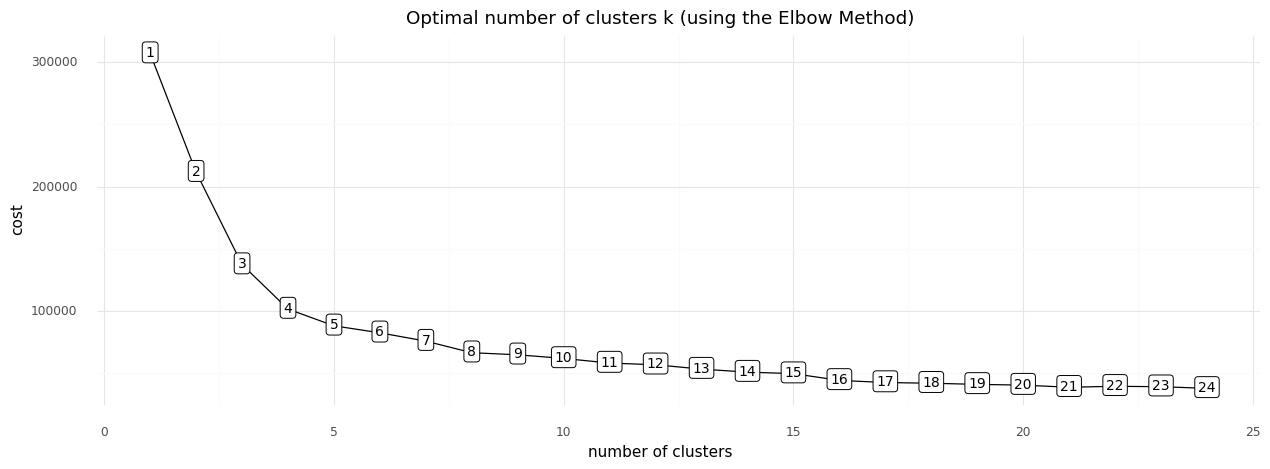

<ggplot: (8792197353698)>

In [21]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [72]:
# Fit the cluster
OPTIMAL_K = 4

kmeans = computed_clusters[OPTIMAL_K]

In [73]:
# Cluster centorid
kmeans.cluster_centers_

array([[ 3.27428214e+00, -1.10664150e+00,  2.31698310e-02, ...,
         2.02336408e-18, -3.54363911e-19, -3.47747651e-17],
       [-3.57274006e-01,  3.93867488e+00,  6.76281446e-01, ...,
         7.41192281e-19,  4.86351005e-19, -3.49862746e-17],
       [-2.61445444e+00, -9.77839256e-01, -5.49062614e-01, ...,
         7.86589648e-19,  5.48124197e-19, -3.50176830e-17],
       [ 2.63774191e+00, -1.03314376e-01, -9.11353311e-01, ...,
         2.25760123e-21,  8.79681062e-19, -3.51138598e-17],
       [ 2.39538204e-01, -2.95841273e+00,  3.42613392e+00, ...,
         5.69612778e-19, -3.79647049e-20, -3.48462276e-17]])

In [74]:
# Check the iteration of the clusters created
kmeans.n_iter_

6

In [75]:
# Check the cost of the clusters created
kmeans.inertia_

88175.99581270355

In [76]:
# Add cluster labels to original dataframe
pca_X['cluster'] = kmeans.labels_
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [77]:
pca_X.head()

0        1        2        3        4        5        6        7  \
0 -0.31184  3.88764  0.68388  0.24806  0.04622  0.17293 -0.37174  0.01891   
1 -2.74024 -1.02378 -0.91248 -0.22932 -0.19228 -0.55826  0.15009 -0.40583   
2 -2.60729 -1.03025 -0.79269 -0.21228 -0.14609 -0.35315  0.00915  0.01710   
3 -0.34979  3.79917  0.57089 -0.04444 -0.35493 -0.96053  0.29892 -0.17194   
4 -2.60607 -1.02864 -0.79052 -0.21050 -0.14765 -0.35342  0.00999  0.00805   

         8        9       10       11       12       13       14       15  \
0 -0.02598  0.11950 -0.06200  0.01950  0.00678  0.03510  0.02630 -0.01893   
1  0.26732 -0.28849  0.24739  0.13808 -0.17698  0.03833 -0.07807 -0.04784   
2  0.06375 -0.04385 -0.28369 -0.10605 -0.05647 -0.07826 -0.07376 -0.07301   
3  0.11140 -0.38945 -0.05538  0.08835 -0.14987 -0.06573  0.01791  0.06031   
4  0.07148 -0.04698 -0.29251 -0.09431 -0.06698 -0.07377 -0.08222 -0.07473   

        16       17       18       19       20       21       22       23  \
0  0.03578  0.00276 -0.12999 -0.00095  0.06540 -0.00500 -0.02707 -0.01499   
1 -0.26885  0.16897  0.35472 -0.18022 -0.25726 -0.27393 -0.19985 -0.28307   
2  0.13361 -0.15498 -0.13346 -0.15939  0.26238 -0.00218 -0.13290  0.09117   
3 -0.08943  0.04257 -0.03130  0.08705 -0.11207 -0.03540 -0.01426  0.02201   
4  0.14217 -0.17050 -0.12525 -0.15726  0.26481 -0.01186 -0.14906  0.09888   

        24       25       26       27       28       29       30       31  \
0 -0.09796  0.13168 -0.05015  0.20956  0.01588 -0.09028 -0.06313 -0.09048   
1 -0.26200 -0.12964  0.02183  0.11059  0.03088  0.02512 -0.07943  0.08312   
2 -0.10659  0.11227  0.00335  0.11464 -0.07168  0.03899  0.00308 -0.04217   
3 -0.00426  0.01759 -0.01984 -0.09719  0.12021  0.07427  0.12378 -0.31291   
4 -0.13563  0.11310  0.00412  0.11834 -0.07886  0.04063 -0.00304 -0.05449   

        32       33       34       35       36       37       38      39  \
0 -0.17072  0.05998  0.39428 -0.06247 -0.02438  0.00915  0.00597 0.01338   
1 -0.03529  0.03602 -0.02851  0.06254  0.01147  0.01297 -0.02994 0.09010   
2 -0.02664  0.11214 -0.07181  0.01493 -0.02328 -0.07403 -0.00756 0.07157   
3 -0.03542 -0.23830  0.00578  0.05366  0.03058  0.05467  0.27142 0.02268   
4 -0.02150  0.11757 -0.07369  0.01019 -0.02571 -0.08604 -0.00804 0.07750   

        40      41       42       43       44       45       46       47  \
0 -0.00273 0.21797  0.21777  0.00149  0.04427  0.15455  0.04392  0.00660   
1 -0.04154 0.08430 -0.05947  0.00358  0.01188 -0.00517 -0.03701 -0.04629   
2 -0.13139 0.20738 -0.04949 -0.02479 -0.01131 -0.00853 -0.12270 -0.20099   
3 -0.24113 0.02883  0.11343 -0.03920  0.05658  0.06981  0.06809  0.03857   
4 -0.13352 0.20499 -0.05091 -0.02361 -0.01017 -0.00977 -0.12353 -0.20064   

        48       49       50       51       52       53       54       55  \
0 -0.01537 -0.01470  0.04308 -0.04043  0.02299 -0.07486 -0.01863 -0.02371   
1 -0.02231  0.00145  0.00602  0.00023  0.00265  0.00462  0.00010 -0.01400   
2  0.04813 -0.03172 -0.02012  0.03811  0.01839  0.03179 -0.00651  0.01436   
3 -0.02061  0.00717 -0.01350  0.00030 -0.00484 -0.06140  0.01452 -0.00528   
4  0.04732 -0.03389 -0.02022  0.04094  0.01994  0.03241 -0.00582  0.01495   

        56      57       58       59       60       61       62       63  \
0 -0.03375 0.05457  0.00353 -0.02512 -0.16110 -0.09114 -0.11533 -0.00798   
1 -0.00252 0.03430 -0.00765 -0.00205 -0.00723 -0.02035 -0.01679  0.01597   
2 -0.00870 0.03426 -0.00390  0.02103  0.04672  0.02324  0.02098  0.00418   
3  0.05037 0.08010  0.00173  0.09164  0.16259 -0.00212  0.05531  0.02097   
4 -0.00882 0.03449 -0.00430  0.02203  0.04768  0.02313  0.02017  0.00448   

        64       65       66       67       68       69       70       71  \
0  0.00622  0.01062  0.00590  0.02686  0.01759 -0.02026  0.01355  0.00005   
1 -0.00838 -0.00525 -0.01578 -0.00006 -0.02117  0.00826 -0.01676 -0.04945   
2  0.01552  0.00391  0.00629  0.01153  0.01926  0.00304 -0.02071  0.02581   
3  0.01187 -0.0

In [78]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 261,           262,           263,           264,
                 265,           266,           267,           268,
           'cluster', 'cluster_cat'],
      dtype='object', length=271)

In [79]:
pca_X['cluster'].value_counts()

2    6899
3    4153
1    3621
0    2450
4    1479
Name: cluster, dtype: int64

## 3. Results

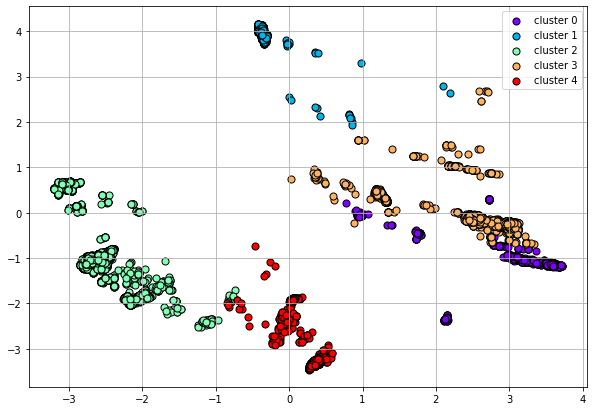

In [80]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

plt.rcParams["figure.figsize"] = (10,7)
colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kmeans.labels_ == i, 0], pca_X_array[kmeans.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [81]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kmeans.labels_ == i, 0], 
                   pca_X_array[kmeans.labels_ == i, 1], 
                   pca_X_array[kmeans.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

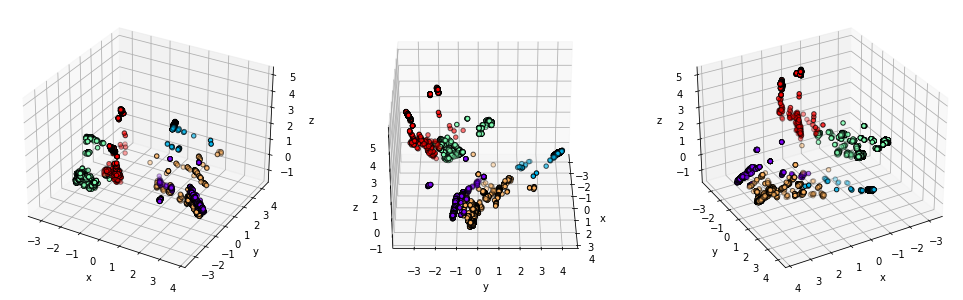

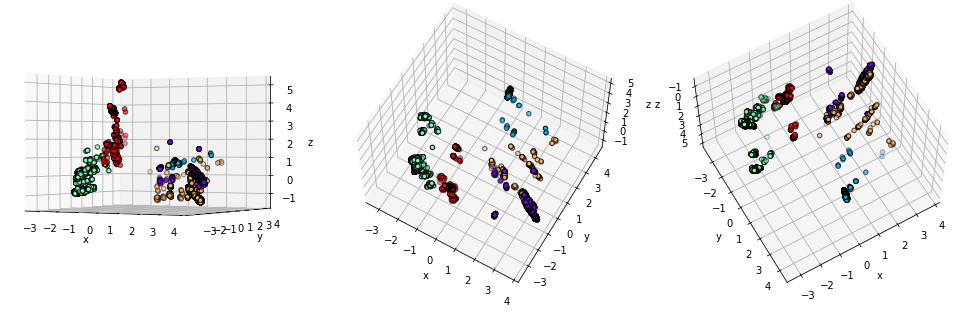

In [82]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [83]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [84]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0     -0.31184  3.88764  0.68388  0.24806  0.04622  0.17293 -0.37174  0.01891   
1     -2.74024 -1.02378 -0.91248 -0.22932 -0.19228 -0.55826  0.15009 -0.40583   
2     -2.60729 -1.03025 -0.79269 -0.21228 -0.14609 -0.35315  0.00915  0.01710   
3     -0.34979  3.79917  0.57089 -0.04444 -0.35493 -0.96053  0.29892 -0.17194   
4     -2.60607 -1.02864 -0.79052 -0.21050 -0.14765 -0.35342  0.00999  0.00805   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -1.94197 -1.87322  0.11927  2.60350  0.61115  0.05020 -0.06767 -0.41767   
18598 -2.52266 -0.93738 -0.79699 -0.42170 -0.29281 -1.02001  0.33135  0.15314   
18599  0.35736 -3.36396  3.58863 -0.77505  0.01467  0.23549 -1.29956  0.08669   
18600  2.60419 -0.12587 -0.70338 -0.69956  1.12323  0.72419 -0.37962  1.29707   
18601  2.97023 -0.24807 -1.27154 -0.96191 -1.25341 -0.12719  0.11598 -0.24414   

             8        9       10       11       12       13       14       15  \
0     -0.02598  0.11950 -0.06200  0.01950  0.00678  0.03510  0.02630 -0.01893   
1      0.26732 -0.28849  0.24739  0.13808 -0.17698  0.03833 -0.07807 -0.04784   
2      0.06375 -0.04385 -0.28369 -0.10605 -0.05647 -0.07826 -0.07376 -0.07301   
3      0.11140 -0.38945 -0.05538  0.08835 -0.14987 -0.06573  0.01791  0.06031   
4      0.07148 -0.04698 -0.29251 -0.09431 -0.06698 -0.07377 -0.08222 -0.07473   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.07891 -0.02381  0.61800  0.50759 -0.10673  0.27790  0.00465 -0.18122   
18598 -0.03056 -0.38689 -0.02023  0.12675 -0.06947  0.32662 -0.31469 -0.14536   
18599 -0.03227 -0.09891 -0.25659  0.00102  0.23517  0.38705  0.18502 -0.36297   
18600  2.22740  0.49142  0.14085 -0.10194 -0.28169  0.28579 -0.10711  0.26645   
18601 -0.07952 -0.26215  0.40338 -0.09152 -0.12647 -0.03146  0.08077 -0.05173   

            16       17       18       19       20       21       22       23  \
0      0.03578  0.00276 -0.12999 -0.00095  0.06540 -0.00500 -0.02707 -0.01499   
1     -0.26885  0.16897  0.35472 -0.18022 -0.25726 -0.27393 -0.19985 -0.28307   
2      0.13361 -0.15498 -0.13346 -0.15939  0.26238 -0.00218 -0.13290  0.09117   
3     -0.08943  0.04257 -0.03130  0.08705 -0.11207 -0.03540 -0.01426  0.02201   
4      0.14217 -0.17050 -0.12525 -0.15726  0.26481 -0.01186 -0.14906  0.09888   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.09265  0.12325 -0.15083  0.04589  0.28881  0.03303  0.15027 -0.06613   
18598 -0.19504  0.20720 -0.24499 -0.19580  0.37524  0.10722  0.00614  0.10733   
18599 -0.18150 -0.16147  0.02589  0.14472 -0.06052 -0.11384 -0.04098 -0.29599   
18600 -0.20787 -0.23662 -0.08284 -0.34427 -0.19221 -0.04646 -0.20649 -0.11408   
18601 -0.41455  0.42929  0.03104 -0.16483 -0.22477 -0.00232  0.07681 -0.23740   

            24       25       26       27       28       29       30       31  \
0     -0.09796  0.13168 -0.05015  0.20956  0.01588 -0.09028 -0.06313 -0.09048   
1     -0.26200 -0.12964  0.02183  0.11059  0.03088  0.02512 -0.07943  0.08312   
2     -0.10659  0.11227  0.00335  0.11464 -0.07168  0.03899  0.00308 -0.04217   
3     -0.00426  0.01759 -0.01984 -0.09719  0.12021  0.07427  0.12378 -0.31291   
4     -0.13563  0.11310  0.00412  0.11834 -0.07886  0.04063 -0.00304 -0.05449   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.06128  0.20630 -0.06052  0.11363  0.00806  0.07122  0.01520 -0.07764   
18598  0.23050 -0.04746 -0.08477  0.12740 -0.00526  0.05720  0.00024  0.11695   
18599 -0.07083 -0.05502 -0.03871 -0.17962  0.00486  0.06497 -0.18029 -0.03558   
18600  0.19957 -0.03921 -0.10544 -0.01164 -0.16258 -0.18887 -0.02385 -0.26341   
18601  0.32345 -0.03969  0.00270  0.06676  0.06782 -0.13380  0.07901  0.12656   

            32       33       34       35       36       37       38       39  \
0     -0.17072  0.05998  0.39428 -0.0624

In [86]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [87]:
print('Time:')
print_df_func(result, 'timestamp', 'min')
print_df_func(result, 'timestamp', 'max')

Time:
timestamp min = 2017-07-04T17:45:00.041825Z
timestamp max = 2017-07-04T18:14:59.69141Z



In [88]:
plt.rcParams["figure.figsize"] = (10,7)

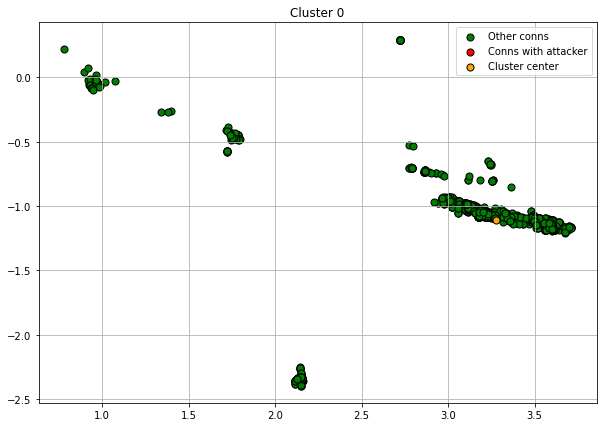

Total num of conns: 2450

Attacker conns ratio:
No     2336
Yes     114
Name: attacker_label, dtype: int64

IPs:
192.168.10.25    1704
192.168.10.51     626
192.168.10.16      79
192.168.10.15      31
192.168.10.12      10
Name: originated_ip, dtype: int64

172.16.0.1        114
52.84.145.136      93
52.84.145.207      66
162.213.33.50      60
52.84.145.135      49
                 ... 
172.217.12.168      1
52.55.1.224         1
78.46.111.164       1
185.76.234.247      1
52.218.64.11        1
Name: responded_ip, Length: 411, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:00.12433Z
timestamp max = 2017-07-04T18:14:58.479854Z

Cluster 0 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
765    Csee272cHGMw88f5y1            1.00000  192.168.10.25           0.21599   
5897    CqsNFTFIvvG85o297            1.00000  192.168.10.25           0.76639   
11983   Cz0IJ21Vky6KnG1st            1.00000  192.168.10.25           0.45370   
14150  CPuoaA2f2PvGj7h9Od            1.00000  192.168.10.25           0.76639   
16791   Cdlw4tQbJADWj4I28            1.00000  192.168.10.25           0.77056   
15405  CdoeVP3RSdwNEkjLG4            1.00000  192.168.10.25           0.76639   
8629    CsMOyT5aQxX9vZB7c            1.00000  192.168.10.25           0.26920   
15047   CDDKqq2fNVBvHdAMD            1.00000  192.168.10.25           0.21599   
14141    CZPp6gtWoVZaiAqw            1.00000  192.168.10.25           0.76639   
10539  CI0mQi1PbeN379VqWg            1.00000  192.168.10.25           0.21599   
13310   C4XlVSsuzMRU7jNJe            1.00000  192.168.10.25           0.21599   
484    Cyo3qG2fyfDfvEj8Ua            1.00000  192.168.10.16           0.37880   
14532   C7KkttjrGSho4a0Ia            1.00000  192.168.10.25           0.21599   
15850  CTygtm1VG0UsIzp6va            1.00000  192.168.10.25           0.76639   
12763  Ckcqed4Zp28mpHyB06            1.00000  192.168.10.25           0.76639   

          responded_ip                    timestamp  connection.time  \
765      52.84.145.117  2017-07-04T17:46:50.912092Z          0.06161   
5897    172.217.12.163  2017-07-04T17:47:56.550584Z          0.09808   
11983    104.97.139.37  2017-07-04T17:53:16.041462Z          0.27561   
14150    172.217.9.234  2017-07-04T17:53:56.821679Z          0.29827   
16791  173.194.205.155  2017-07-04T18:02:27.063697Z          0.58179   
15405    172.217.11.34  2017-07-04T17:46:59.595204Z          0.06643   
8629      63.251.98.12  2017-07-04T18:12:46.999605Z          0.92627   
15047     52.84.145.70  2017-07-04T18:10:46.985556Z          0.85958   
14141    172.217.3.104  2017-07-04T18:09:06.714516Z          0.80386   
10539    52.84.145.148  2017-07-04T18:00:14.685717Z          0.50823   
13310    52.84.145.207  2017-07-04T18:08:11.675859Z          0.77328   
484     87.250.251.119  2017-07-04T17:45:05.500355Z          0.00303   
14532    52.84.145.207   2017-07-04T17:54:41.48609Z          0.32309   
15850   172.217.10.227  2017-07-04T17:50:46.015652Z          0.19225   
12763     172.217.10.3  2017-07-04T17:50:44.459868Z          0.19138   

       duration  connection.duration protocol service conn_state  \
765     0.19068              0.00011      tcp     ssl         SF   
5897    0.00000              0.00000      tcp    none         SH   
11983   0.00000              0.00000      tcp    none         SH   
14150   0.36868              0.00022      tcp     ssl         SF   
16791   0.00000              0.00000      tcp    none         SH   
15405   0.00000              0.00000      tcp    none         SH   
8629    0.08983              0.00005      tcp    http         SF   
15047   0.29149              0.00017      tcp     ssl         SF   
14141   0.00000              0.00000      tcp    none         SH   
10539   0.43955              0.00026      tcp     ssl         SF   
13310   0.31998              0.00019      tcp     ssl         SF   
484    24.36104              0.01449      tcp    none         SF   
14532   0.43698              0.00026      tcp     ssl         SF   
15850   0.77408              0.00046      tcp    http         SF   
12763   0.17098              0.00010      tcp    http         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
765              0.92405   60553  orig_reg_or_dyn                0.00872   
5897             0.91648   60057  orig_reg_or_dyn                0.00000   
11983            0.91147   59729  orig_reg_or_dyn                0.00000   
14150            0.93477   61256  orig_reg_or_dyn                0.00950   
16791            0.93429   61224  orig_reg_or_dyn                0.00000   
15405            0.91544   

Protocol:
tcp    2394
udp      56
Name: protocol, dtype: int64

Service:
ssl     1534
none     521
http     342
ntp       28
dns       25
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2412
orig_well_known      38
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           1986
resp_80             405
resp_123             28
resp_well_known      28
resp_reg              3
Name: resp_p_cat, dtype: int64




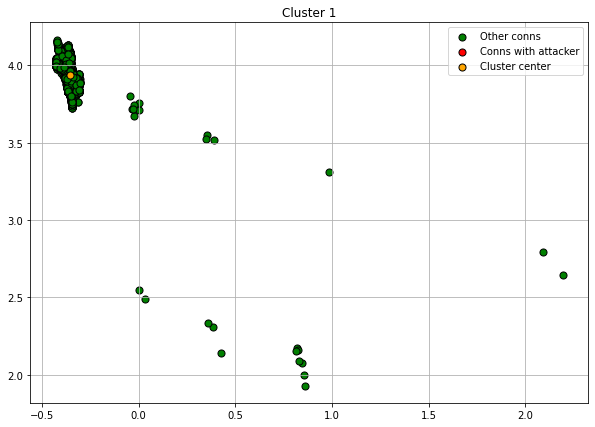

Total num of conns: 3621

Attacker conns ratio:
No    3621
Name: attacker_label, dtype: int64

IPs:
192.168.10.3     3609
192.168.10.50      12
Name: originated_ip, dtype: int64

192.168.10.1      3596
192.168.10.255      12
224.0.0.251          2
129.6.15.29          2
144.217.164.10       2
24.86.68.24          2
224.0.0.252          1
65.52.108.186        1
207.210.46.249       1
224.0.1.24           1
131.253.34.234       1
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:04.733364Z
timestamp max = 2017-07-04T18:14:59.69141Z

Cluster 1 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
18352   CZ8lswLoU4gYO9WCf            1.00000  192.168.10.3           0.85685   
9352    C6fdZ440svT5MF0oc            1.00000  192.168.10.3           0.85685   
7973   Cjr8Y026sN8vTk5F0j            1.00000  192.168.10.3           0.85685   
13893  CruBUJ28Xm6Iz9Z8jj            1.00000  192.168.10.3           0.85685   
8378   CIaO472PpRlq94Lmmh            1.00000  192.168.10.3           0.85685   
6065    CmuswlMzbZ5mR8yh8            1.00000  192.168.10.3           0.85685   
16159  Ce3y2m21gJXmFPTdNc            1.00000  192.168.10.3           0.85685   
5358   CnBUZw2h8811QbPY7e            1.00000  192.168.10.3           0.85685   
8360   CXv9192XD3TvgHcNT4            1.00000  192.168.10.3           0.85685   
1671   CIr7xk4rDqsUc9Hxw7            1.00000  192.168.10.3           0.85685   
12225  CU1TnJ1jUlUIUyXGOd            1.00000  192.168.10.3           0.85685   
524    C07mo22cABw0aMAyFb            1.00000  192.168.10.3           0.85685   
4563   CkLaeQ3EvhdQQka2r9            1.00000  192.168.10.3           0.85685   
12465  CtCyu63WQbkMQ9mAH1            1.00000  192.168.10.3           0.85685   
14157  Cud2SD4l0nQzLU8DGe            1.00000  192.168.10.3           0.85685   

       responded_ip                    timestamp  connection.time  duration  \
18352  192.168.10.1  2017-07-04T18:09:54.352682Z          0.83033   0.06754   
9352   192.168.10.1  2017-07-04T17:59:33.556396Z          0.48538   0.02340   
7973   192.168.10.1  2017-07-04T17:45:44.808484Z          0.02488   0.00046   
13893  192.168.10.1  2017-07-04T17:53:29.395683Z          0.28303   0.31350   
8378   192.168.10.1  2017-07-04T17:46:46.695882Z          0.05926   0.05390   
6065   192.168.10.1  2017-07-04T18:14:58.980354Z          0.99960   0.04678   
16159  192.168.10.1    2017-07-04T18:11:17.5861Z          0.87658   0.21159   
5358   192.168.10.1  2017-07-04T17:49:46.997397Z          0.15945   0.07106   
8360   192.168.10.1  2017-07-04T18:14:53.191384Z          0.99639   0.02368   
1671   192.168.10.1  2017-07-04T18:12:16.151952Z          0.90913   0.04706   
12225  192.168.10.1  2017-07-04T17:53:47.781276Z          0.29325   0.04965   
524    192.168.10.1   2017-07-04T18:06:01.09876Z          0.70072   0.02390   
4563   192.168.10.1   2017-07-04T18:13:58.97447Z          0.96626   0.03703   
12465  192.168.10.1  2017-07-04T18:05:54.396433Z          0.69700   0.00051   
14157  192.168.10.1  2017-07-04T17:53:31.870872Z          0.28440   0.09945   

       connection.duration protocol service conn_state  connection.orig_p  \
18352              0.00004      udp     dns         SF            0.94650   
9352               0.00001      udp     dns         SF            0.93674   
7973               0.00000      udp     dns         SF            0.91837   
13893              0.00019      udp     dns         SF            0.92965   
8378               0.00003      udp     dns         SF            0.93091   
6065               0.00003      udp     dns         SF            0.93455   
16159              0.00013      udp     dns         SF            0.93358   
5358               0.00004      udp     dns         SF            0.94863   
8360               0.00001      udp     dns         SF            0.92017   
1671               0.00003      udp     dns         SF            0.92342   
12225              0.00003      udp     dns         SF            0.93963   
524                0.00001      udp     dns         SF            0.92231   
4563               0.00002      udp     dns         SF            0.92499   
12465              0.00000      udp     dns         SF            0.94985   
14157              0.00006      udp     dns         SF            0.95284   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
18352   62024  orig_reg_or_dyn                0.00054       54   
9352    61385  orig_reg_or_dyn                0.00056       56   
7973    60181  orig_reg_or_dyn               

Protocol:
udp    3619
tcp       2
Name: protocol, dtype: int64

Service:
dns     3605
none       9
ntp        7
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3601
orig_well_known      20
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            3596
resp_well_known      13
resp_123              7
resp_reg              3
resp_443              2
Name: resp_p_cat, dtype: int64




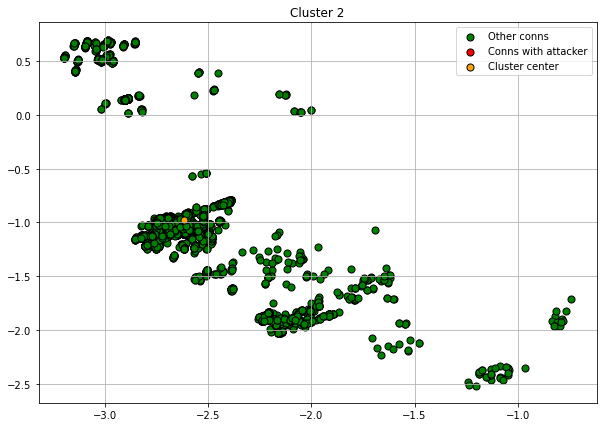

Total num of conns: 6899

Attacker conns ratio:
No    6899
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    1123
192.168.10.8      839
192.168.10.9      800
192.168.10.14     711
192.168.10.12     686
192.168.10.5      639
192.168.10.50     411
192.168.10.51     375
192.168.10.15     368
192.168.10.25     340
192.168.10.17     340
192.168.10.16     267
Name: originated_ip, dtype: int64

192.168.10.3     6887
192.168.10.50      12
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:00.659633Z
timestamp max = 2017-07-04T18:14:59.623703Z

Cluster 2 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
6277   CaS7oz2jZ0kDMyYuIe            1.00000   192.168.10.8           0.85685   
5416   CgauS82tKM5nky8IO6            1.00000  192.168.10.14           0.85685   
17226  CRymWw2SImfJfTQeZ1            1.00000  192.168.10.19           0.85685   
7566   CTtCox4WHTgS9n5VD8            1.00000   192.168.10.9           0.85685   
16401  CKy1Lz48Zpz0BzHH68            1.00000  192.168.10.15           0.85685   
6109    CRwwXcqnh5jMy5DCd            1.00000  192.168.10.12           0.85685   
11814  C5blP21r65uBARvOJ1            1.00000  192.168.10.19           0.85685   
13157  C9wjXu2NeIqMX0VlW9            1.00000   192.168.10.9           0.85685   
18583  C07hpp2DTFealjQmcl            1.00000  192.168.10.25           0.85685   
5617   CSHKYN1hTlgKlImvpa            1.00000  192.168.10.17           0.85685   
16504  CON1T630EREnjsrsA8            1.00000  192.168.10.12           0.85685   
4921   Cjc7M52511RJ9Gt4Ta            1.00000  192.168.10.15           0.85685   
14171  Cs4pBs2fpzOx27s0q7            1.00000   192.168.10.8           0.85685   
9403   C0NtbG3CUzlWDfhDlb            1.00000   192.168.10.9           0.85685   
7503   CZqF8D2PayMYQ0EXGa            1.00000  192.168.10.50           0.85685   

       responded_ip                    timestamp  connection.time  duration  \
6277   192.168.10.3  2017-07-04T17:45:43.782535Z          0.02431   0.21187   
5416   192.168.10.3   2017-07-04T17:58:48.83635Z          0.46053   0.00018   
17226  192.168.10.3  2017-07-04T17:50:27.807928Z          0.18213   0.06164   
7566   192.168.10.3  2017-07-04T18:09:53.861416Z          0.83006   0.13658   
16401  192.168.10.3  2017-07-04T18:05:50.843702Z          0.69503   0.00018   
6109   192.168.10.3  2017-07-04T17:51:24.886443Z          0.21384   0.00038   
11814  192.168.10.3  2017-07-04T17:59:03.991554Z          0.46895   0.00032   
13157  192.168.10.3  2017-07-04T18:09:53.512427Z          0.82987   0.02369   
18583  192.168.10.3  2017-07-04T17:46:51.361169Z          0.06186   0.08679   
5617   192.168.10.3   2017-07-04T18:14:09.37096Z          0.97204   1.41839   
16504  192.168.10.3  2017-07-04T18:14:55.662789Z          0.99776   0.00022   
4921   192.168.10.3  2017-07-04T17:52:23.052526Z          0.24616   0.07722   
14171  192.168.10.3  2017-07-04T17:45:45.600003Z          0.02532   0.00027   
9403   192.168.10.3  2017-07-04T18:09:48.847274Z          0.82728   0.02381   
7503   192.168.10.3  2017-07-04T18:09:31.324156Z          0.81754   0.00027   

       connection.duration protocol service conn_state  connection.orig_p  \
6277               0.00013      udp     dns         SF            0.98436   
5416               0.00000      udp     dns         SF            0.89107   
17226              0.00004      udp     dns         SF            0.93645   
7566               0.00008      udp     dns         SF            0.99695   
16401              0.00000      udp     dns         SF            0.93702   
6109               0.00000      udp     dns         SF            0.27431   
11814              0.00000      udp     dns         SF            0.70870   
13157              0.00001      udp     dns         SF            0.75470   
18583              0.00005      udp     dns         SF            0.91318   
5617               0.00084      udp     dns         SF            0.56374   
16504              0.00000      udp     dns         SF            0.91034   
4921               0.00005      udp     dns         SF            0.83930   
14171              0.00000      udp     dns         SF            0.81482   
9403               0.00001      udp     dns         SF            0.90112   
7503               0.00000      udp     dns         SF            0.24478   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
6277    64505  orig_reg_or_dyn                0.00074       74   
5416    58392  orig_reg_or_dyn                0.00088       88   
17226   61366  orig_reg_or_dy

Protocol:
udp    6803
tcp      96
Name: protocol, dtype: int64

Service:
dns                6727
none                 79
krb                  32
ntp                  30
krb_tcp              11
dce_rpc               9
smb,krb,gssapi        8
smb,ntlm,gssapi       2
smb                   1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    6845
orig_well_known      54
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            6703
resp_well_known     136
resp_123             30
resp_reg             25
resp_dyn              5
Name: resp_p_cat, dtype: int64




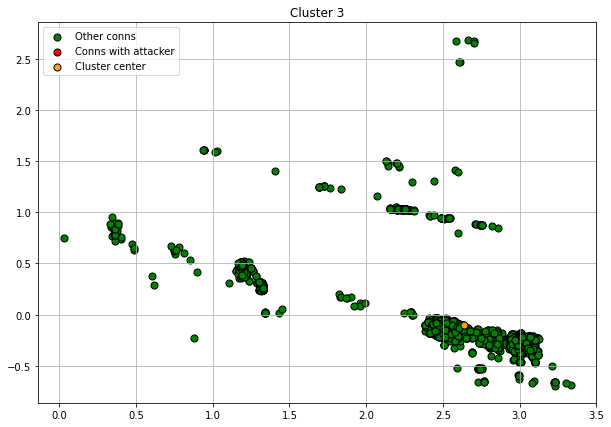

Total num of conns: 4153

Attacker conns ratio:
No    4153
Name: attacker_label, dtype: int64

IPs:
192.168.10.19     807
192.168.10.12     568
192.168.10.9      558
192.168.10.14     472
192.168.10.5      433
192.168.10.8      431
192.168.10.17     417
192.168.10.15     270
192.168.10.16     177
192.168.10.50      13
192.168.10.3        6
123.130.127.12      1
Name: originated_ip, dtype: int64

23.60.139.27      98
178.255.83.1      97
72.21.91.29       85
50.63.243.230     81
23.50.75.27       68
                  ..
72.5.205.27        1
104.97.125.111     1
207.244.76.83      1
31.13.80.36        1
52.86.23.125       1
Name: responded_ip, Length: 1093, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:00.041825Z
timestamp max = 2017-07-04T18:14:59.550182Z

Cluster 3 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
8978   CbqbbC3EDnCJO7OQ14            1.00000   192.168.10.9           0.81823   
10827   CK7Z38Ifh7FQdC5Y7            1.00000   192.168.10.5           0.76639   
8860   C0M7fu3uzt4Fl3TQVi            1.00000   192.168.10.8           0.45632   
17917  CqwGxb2ItQTLGtG8s6            1.00000  192.168.10.12           0.31884   
10137  CjeFc43oSsV0CJ9EYh            1.00000   192.168.10.9           0.90397   
9123   CVk47W1BCJy6EEEvk3            1.00000   192.168.10.8           0.96705   
14887  CYodTb3XqoSTIf6L4b            1.00000   192.168.10.8           0.87010   
3868   CoA4Cp4ZU1S6vTHfT1            1.00000  192.168.10.17           0.39632   
13769  CWGCid3vJAQuF3lFQ9            1.00000  192.168.10.19           0.45370   
5531    C3HjgeTQML1Zkjx5f            1.00000   192.168.10.5           0.31889   
1176   Cs0ntL3nMxLQSNtAr6            1.00000  192.168.10.12           0.31712   
556    CA3pZC3QQpQF85d8p9            1.00000  192.168.10.15           0.96451   
15149  CFnZfc1yVKx9twfQoc            1.00000   192.168.10.8           0.96451   
7092    C3kBGQW9gJ1r9elk8            1.00000   192.168.10.9           0.76639   
2403   CnGDo31m2JcRCsFEX2            1.00000  192.168.10.19           0.28039   

          responded_ip                    timestamp  connection.time  \
8978    184.50.238.170  2017-07-04T17:45:09.115402Z          0.00504   
10827   172.217.10.227   2017-07-04T18:04:55.63809Z          0.66435   
8860     104.244.43.80  2017-07-04T18:03:12.666804Z          0.60713   
17917    74.217.253.60  2017-07-04T18:06:16.387665Z          0.70922   
10137  202.248.252.160  2017-07-04T18:05:43.948925Z          0.69119   
9123    216.200.232.61  2017-07-04T17:45:44.968423Z          0.02496   
14887  195.142.109.125    2017-07-04T17:54:06.8292Z          0.30383   
3868     91.209.35.126  2017-07-04T17:54:09.395011Z          0.30526   
13769    104.97.139.37  2017-07-04T17:57:46.872698Z          0.42610   
5531    74.220.195.201  2017-07-04T17:59:29.583113Z          0.48317   
1176     74.121.138.97  2017-07-04T18:06:01.123899Z          0.70074   
556     216.58.219.196  2017-07-04T18:05:52.353879Z          0.69586   
15149   216.58.219.196  2017-07-04T18:03:12.192704Z          0.60687   
7092     172.217.11.34  2017-07-04T18:09:49.052481Z          0.82739   
2403       66.110.99.9  2017-07-04T17:57:50.188049Z          0.42794   

       duration  connection.duration protocol service conn_state  \
8978   25.23775              0.01501      tcp    none         SF   
10827   1.55718              0.00093      tcp     ssl         SF   
8860   10.20674              0.00607      tcp     ssl         SF   
17917  65.15838              0.03876      tcp     ssl         SF   
10137   0.00000              0.00000      tcp    none         S0   
9123  281.06854              0.16720      tcp    http       RSTO   
14887   0.48133              0.00029      tcp     ssl         SF   
3868    0.57279              0.00034      tcp     ssl         SF   
13769 266.50016              0.15853      tcp     ssl         SF   
5531   11.43266              0.00680      tcp     ssl         SF   
1176  360.12287              0.21422      tcp     ssl         SF   
556   181.68281              0.10808      tcp     ssl         SF   
15149 181.20831              0.10779      tcp     ssl         SF   
7092  115.28566              0.06858      tcp    http         SF   
2403  150.76405              0.08968      tcp     ssl         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
8978             0.11064    7253  orig_reg_or_dyn                0.00001   
10827            0.89565   58692  orig_reg_or_dyn                0.00528   
8860             0.85090   55760  orig_reg_or_dyn                0.00760   
17917            0.79154   51870  orig_reg_or_dyn                0.00845   
10137            0.11653    7639  orig_reg_or_dyn                0.00000   
9123             0.84765   

Protocol:
tcp     3777
udp      375
icmp       1
Name: protocol, dtype: int64

Service:
ssl     2267
http     897
none     625
ntp      307
dns       57
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3784
orig_well_known     369
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           2431
resp_80            1316
resp_123            307
resp_well_known      91
resp_reg              8
Name: resp_p_cat, dtype: int64




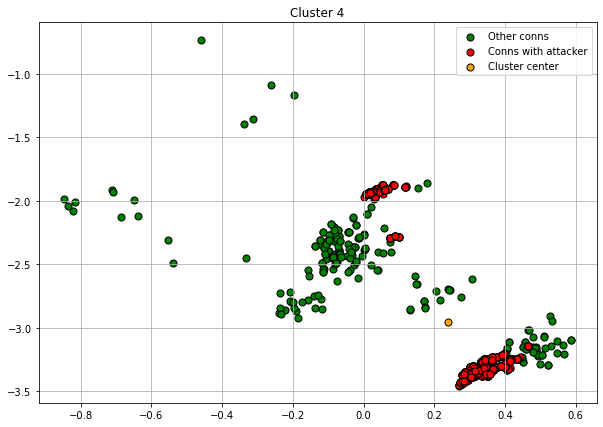

Total num of conns: 1479

Attacker conns ratio:
Yes    1260
No      219
Name: attacker_label, dtype: int64

IPs:
172.16.0.1        1260
192.168.10.25       46
192.168.10.16       23
192.168.10.12       22
192.168.10.51       21
192.168.10.5        19
192.168.10.19       19
192.168.10.14       18
192.168.10.8        17
192.168.10.9        16
192.168.10.15       10
192.168.10.17        6
63.241.108.104       1
185.49.84.72         1
Name: originated_ip, dtype: int64

192.168.10.50    1477
192.168.10.14       1
192.168.10.8        1
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:00.121663Z
timestamp max = 2017-07-04T18:14:41.703035Z

Cluster 4 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
4023    CHAqBa6COiN25ROa8            0.84000    172.16.0.1           0.85685   
2263   CFs2YF47PgDqTSuKUd            0.84000    172.16.0.1           0.85685   
2559    Ccgsf2FHzyBI9385g            0.84000    172.16.0.1           0.85685   
6954   CiexS647OhS5Kdj116            0.84000    172.16.0.1           0.85685   
17085  C9c4DW1HR3oBA6XXWh            0.84000    172.16.0.1           0.85685   
5482    CBlfsNhQHwVP0364i            0.84000    172.16.0.1           0.85685   
3851   CCDF9X1hTBA0Tx1mej            0.84000    172.16.0.1           0.85685   
16398  C5CC8w3jhN7ChWR0Ke            0.84000    172.16.0.1           0.85685   
11171  C9WGKp4fk6xA863ad9            0.84000    172.16.0.1           0.85685   
3684   CvKJUU2hN2Vm9FI9y6            0.84000    172.16.0.1           0.85685   
18134  CVAgzu2AubLS3EuUSd            0.84000    172.16.0.1           0.85685   
11203  CJoXFR3HMOlagc80Vj            0.84000    172.16.0.1           0.85685   
1004    CCJJM9qUq2HxUTMbj            0.84000    172.16.0.1           0.85685   
14691   CX5ADhduMm7tdcKbk            0.84000    172.16.0.1           0.85685   
3436   CFR2lh2FkTgM6DANG4            0.84000    172.16.0.1           0.85685   

        responded_ip                    timestamp  connection.time  duration  \
4023   192.168.10.50  2017-07-04T18:01:21.350584Z          0.54528  14.08086   
2263   192.168.10.50  2017-07-04T18:09:16.792299Z          0.80946  12.13688   
2559   192.168.10.50  2017-07-04T17:58:19.455489Z          0.44421  11.84523   
6954   192.168.10.50    2017-07-04T17:47:57.9645Z          0.09887  14.05904   
17085  192.168.10.50  2017-07-04T17:45:55.388153Z          0.03075  12.43963   
5482   192.168.10.50  2017-07-04T17:54:51.623385Z          0.32872  12.90950   
3851   192.168.10.50   2017-07-04T18:06:53.59945Z          0.72990  12.31741   
16398  192.168.10.50  2017-07-04T18:08:25.165952Z          0.78078  13.57092   
11171  192.168.10.50  2017-07-04T17:52:39.374998Z          0.25523  10.63299   
3684   192.168.10.50  2017-07-04T17:49:13.132557Z          0.14063  12.67057   
18134  192.168.10.50  2017-07-04T17:49:35.199752Z          0.15290  12.30112   
11203  192.168.10.50  2017-07-04T17:54:39.943458Z          0.32223  13.11098   
1004   192.168.10.50  2017-07-04T18:04:16.250673Z          0.64246  10.49602   
14691  192.168.10.50  2017-07-04T17:45:58.594727Z          0.03254  11.64602   
3436   192.168.10.50  2017-07-04T18:03:19.381295Z          0.61086  12.20723   

       connection.duration protocol service conn_state  connection.orig_p  \
4023               0.00838      tcp     ssh         SF            0.78427   
2263               0.00722      tcp     ssh         SF            0.79615   
2559               0.00705      tcp     ssh         SF            0.77985   
6954               0.00836      tcp     ssh         SF            0.76434   
17085              0.00740      tcp     ssh         SF            0.76129   
5482               0.00768      tcp     ssh         SF            0.77475   
3851               0.00733      tcp     ssh         SF            0.79395   
16398              0.00807      tcp     ssh         SF            0.79462   
11171              0.00633      tcp     ssh         SF            0.77145   
3684               0.00754      tcp     ssh         SF            0.76602   
18134              0.00732      tcp     ssh         SF            0.76657   
11203              0.00780      tcp     ssh         SF            0.77451   
1004               0.00624      tcp     ssh         SF            0.78931   
14691              0.00693      tcp     ssh         SF            0.76132   
3436               0.00726      tcp     ssh         SF            0.78781   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
4023    51394  orig_reg_or_dyn                0.02010     2008   
2263    52172  orig_reg_or_dyn                0.02010     2008   
2559    51104  orig_reg_or_dy

Cluster 4 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
4866   CDTlNT1JlmE9ciiyN3            1.00000  192.168.10.14           0.85685   
3285   C30TrV2CE6a5SnWqj7            1.00000   192.168.10.5           0.85685   
18543  Cr3w5X2UjFyGA2zEZ4            1.00000   192.168.10.5           0.85685   
7604   C76pDb42nWRGhqnJS1            1.00000  192.168.10.12           0.85685   
4299   CwLsK81vm5dIsZfVKl            1.00000  192.168.10.16           0.85685   
6972   CUTWgj34BgNFW03Mzk            1.00000  192.168.10.14           0.85685   
16364  CwE3rc2aBg3Ataof2d            1.00000  192.168.10.25           0.85685   
14683  CCY5cJ2PVvYgI7Rdb9            1.00000  192.168.10.25           0.85685   
16510  CaTvFH3uyRgwZ9mQE2            1.00000  192.168.10.25           0.85685   
6399    C7c4td19PICIYOOQT            1.00000   192.168.10.5           0.85685   
6569   CIbKb21CYTaCD60sT6            1.00000   192.168.10.5           0.85685   
13627  Ci6FJJ2406qV1xPDTl            1.00000  192.168.10.19           0.85685   
772    CuCPel4rlbYT0QMRM5            1.00000  192.168.10.19           0.85685   
14985  CnUvle4CxkbmwYCIY8            1.00000  192.168.10.25           0.85685   
17077  CDkSP81N5BiMaySUUf            1.00000  192.168.10.19           0.85685   

        responded_ip                    timestamp  connection.time  duration  \
4866   192.168.10.50  2017-07-04T18:12:47.923441Z          0.92678   0.18656   
3285   192.168.10.50  2017-07-04T18:00:26.464055Z          0.51478   0.10489   
18543  192.168.10.50  2017-07-04T17:49:37.851651Z          0.15437   0.23832   
7604   192.168.10.50  2017-07-04T17:56:02.552107Z          0.36813   0.12891   
4299   192.168.10.50  2017-07-04T18:06:38.369206Z          0.72143   1.33182   
6972   192.168.10.50   2017-07-04T17:49:23.44584Z          0.14636   0.07308   
16364  192.168.10.50  2017-07-04T17:59:19.120245Z          0.47736   0.00000   
14683  192.168.10.50  2017-07-04T18:05:19.109416Z          0.67739   0.00000   
16510  192.168.10.50  2017-07-04T18:08:16.452856Z          0.77593   0.00000   
6399   192.168.10.50  2017-07-04T18:05:50.569319Z          0.69487   0.21952   
6569   192.168.10.50  2017-07-04T18:00:26.319066Z          0.51470   0.25059   
13627  192.168.10.50  2017-07-04T17:45:59.828946Z          0.03322   0.13151   
772    192.168.10.50  2017-07-04T18:05:34.691293Z          0.68605   0.00052   
14985  192.168.10.50  2017-07-04T17:51:02.502884Z          0.20141   0.00000   
17077  192.168.10.50  2017-07-04T18:00:08.007917Z          0.50452   1.34175   

       connection.duration protocol   service conn_state  connection.orig_p  \
4866               0.00011      tcp       ftp         SF            0.86190   
3285               0.00006      tcp  ftp-data         SF            0.89539   
18543              0.00014      tcp       ftp         SF            0.89294   
7604               0.00008      tcp       ftp         SF            0.91851   
4299               0.00079      tcp       ssh         SF            0.74487   
6972               0.00004      tcp  ftp-data         SF            0.85922   
16364              0.00000      udp       dns        SHR            0.75605   
14683              0.00000      udp       dns        SHR            0.75610   
16510              0.00000      udp       dns        SHR            0.75613   
6399               0.00013      tcp       ftp         SF            0.89583   
6569               0.00015      tcp       ftp         SF            0.89537   
13627              0.00008      tcp       ftp         SF            0.90267   
772                0.00000      tcp      none         SF            0.79807   
14985              0.00000      udp       dns         SF            0.00204   
17077              0.00080      tcp       ssh         SF            0.79688   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
4866    56481  orig_reg_or_dyn                0.00088       88   
3285    58675  orig_reg_or_dyn                0

Protocol:
tcp     1444
udp       33
icmp       2
Name: protocol, dtype: int64

Service:
ssh                   1282
none                    67
ftp                     41
ftp-data                41
dns                     33
smb,gssapi,dce_rpc      15
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1459
orig_well_known      20
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_22            1335
resp_well_known      62
resp_21              41
resp_reg             29
resp_dyn             12
Name: resp_p_cat, dtype: int64




In [89]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.scatter(
        kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Cluster center'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Evaluation

**Rand index** *can't be used, requires labels.. (https://scikit-learn.org/stable/modules/clustering.html#rand-index)*


Notation: set `S = {1, 2, .. n}` of `x > 2` points, distance function `d(i,j)` measures distance between 2 points from S (d can be Euclidean, Manhattan, Chebyshev, Mahalanobis, .. alternatively similarity function can be used)


#### 3 axioms of Jon Kleinberg: 

- characteristics that a grouping problem shuld exhibit and can be considered "good", independently of alg used to find solution

1. **scale invariance**: `f(d) == f(alfa*d)` for any d and alfa > 0

2. **consistency**: if for every (i,j) from same cluster `d(i,j) >= d'(i,j)` and from different clusters `d(i,j) < d'(i,j)` then `f(d) == f(d')`

3. **wealth, richness**: every partition of S is a possible result of the clustering process

For every n >= 2 there is no clustering alg. that satysfies all three at once. 

2 measure of internal metrics: 

**cohesion** = between points in same cluster

**separation** = between points from different clusters



### Sum of Squared Error (SSE) 

(https://stackoverflow.com/questions/43784903/scikit-k-means-clustering-performance-measure)

Elbow Criterion 

- not available as a function in Scikit (we need to calculate SSE to evaluate K-Means using Elbow Criterion)

**Idea of Elbow Criterion method: choose `k` (number of cluster) at which the SSE decreases abruptly.**

(Small values indicate good quality.)

SSE = sum of squared distance between each member of the cluster and its centroid

SSE tends to decrease toward 0 as we increase k (SSE=0, when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

=> goal: choose a small value of k that still has a low SSE, and the elbow usually represents, where we start to have diminishing returns by increasing k

If the line graph looks like an arm, the "elbow" on the arm is the value of optimal k (number of cluster). 

## Metrics that quantify level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

Single pass eval:

In [40]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

sse = {}
sil = {}
ch = {}
db = {}

from sklearn.cluster import KMeans
from sklearn import metrics

for k in range(2, len(computed_clusters)):
# for k in range(OPTIMAL_K, OPTIMAL_K + 1):
    print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    km = computed_clusters[k]
    km_fit = computed_clusters_fitted[k]
    
    print('K=' + str(k + 1) + ' clusters: ')
    
    sse_score = km_fit.inertia_   
    sse[k] = sse_score
    print('Sum of Squared Error for k = ' + str(k + 1) + ': ' + str(sse_score))
    
    ch_score = metrics.calinski_harabasz_score(pca_X, km_fit.labels_)
    ch[k] = ch_score
    print('Calisnki-Harabasz Coefficient for k = ' + str(k + 1) + ': ' + str(ch_score))
    
    db_score = davies_bouldin_score(pca_X, km_fit.labels_)
    db[k] = db_score
    print('Davies-Bouldin Index for k = ' + str(k + 1) + ': ' + str(db_score))
    
    sil_score = metrics.silhouette_score(pca_X, km.labels_, metric='euclidean')
    sil[k] = sil_score
    print('Silhouette Score for k = ' + str(k + 1) + ': ' + str(sil_score))
    
    print('End at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    print('--')

Start at 00:13:33.
K=3 clusters: 
Sum of Squared Error for k = 3: 137355.7928715576
Calisnki-Harabasz Coefficient for k = 3: 9505.510692137785
Davies-Bouldin Index for k = 3: 1.0811506848975692
Silhouette Score for k = 3: 0.43952052337793907
End at 00:13:38.
--
Start at 00:13:38.
K=4 clusters: 
Sum of Squared Error for k = 4: 101652.27571043829
Calisnki-Harabasz Coefficient for k = 4: 10738.909893260285
Davies-Bouldin Index for k = 4: 0.910309135183748
Silhouette Score for k = 4: 0.5089724441804953
End at 00:13:43.
--
Start at 00:13:43.
K=5 clusters: 
Sum of Squared Error for k = 5: 88175.99581270355
Calisnki-Harabasz Coefficient for k = 5: 13994.278886385542
Davies-Bouldin Index for k = 5: 0.8037322761094716
Silhouette Score for k = 5: 0.5665560019005694
End at 00:13:48.
--
Start at 00:13:48.
K=6 clusters: 
Sum of Squared Error for k = 6: 82578.16141909032
Calisnki-Harabasz Coefficient for k = 6: 12045.131892388492
Davies-Bouldin Index for k = 6: 0.8646328662253903
Silhouette Score fo

In [41]:
sse

{2: 137355.7928715576,
 3: 101652.27571043829,
 4: 88175.99581270355,
 5: 82578.16141909032,
 6: 75870.84742206246,
 7: 66583.01120654235,
 8: 64912.39654284169,
 9: 61983.21735865051,
 10: 58265.171690120274,
 11: 56911.667523229735,
 12: 53402.67219042199,
 13: 50992.55137831807,
 14: 49774.95464311183,
 15: 44357.39961183433,
 16: 42625.74175671606,
 17: 42071.69367055839,
 18: 41150.476431310795,
 19: 40549.23130161127,
 20: 38847.08509538183,
 21: 39611.37122723785,
 22: 39281.55319002402,
 23: 37946.48842956454}

In [42]:
ch

{2: 9505.510692137785,
 3: 10738.909893260285,
 4: 13994.278886385542,
 5: 12045.131892388492,
 6: 11237.387252563074,
 7: 11325.77289981689,
 8: 10221.529726014414,
 9: 8626.449799387525,
 10: 8312.212603735907,
 11: 8328.99021470097,
 12: 7614.414950209271,
 13: 7853.320844623505,
 14: 7507.237743132803,
 15: 8313.08266071136,
 16: 8159.673758996278,
 17: 7778.328897097329,
 18: 7356.78847725246,
 19: 7080.565892887658,
 20: 7045.855275383854,
 21: 6547.964150594854,
 22: 6306.025318142206,
 23: 6258.386417756065}

In [43]:
db

{2: 1.0811506848975692,
 3: 0.910309135183748,
 4: 0.8037322761094716,
 5: 0.8646328662253903,
 6: 1.4340742388704368,
 7: 1.0721946133105582,
 8: 1.0884004985723827,
 9: 1.2492695677121852,
 10: 1.205447041620993,
 11: 1.322666118586875,
 12: 1.1566889531984201,
 13: 1.211149408835124,
 14: 1.3642682215914803,
 15: 1.23425655707573,
 16: 1.201026377768385,
 17: 1.2142606740736963,
 18: 1.2877823673979056,
 19: 1.2762696337634651,
 20: 1.325346739731776,
 21: 1.422469606625699,
 22: 1.4283401859722136,
 23: 1.4406208593003085}

In [44]:
sil

{2: 0.43952052337793907,
 3: 0.5089724441804953,
 4: 0.5665560019005694,
 5: 0.557405118633311,
 6: 0.4159562662885364,
 7: 0.49066242920626146,
 8: 0.42062223564789847,
 9: 0.426902396998085,
 10: 0.43890847739915057,
 11: 0.3417724231215081,
 12: 0.44115518282187827,
 13: 0.4415885671125467,
 14: 0.4136798567195772,
 15: 0.455033755837264,
 16: 0.45707803783736556,
 17: 0.45752086723756263,
 18: 0.4293730543839439,
 19: 0.42709570173206446,
 20: 0.42340061664188766,
 21: 0.4053475903689553,
 22: 0.40342671846623146,
 23: 0.3196567422149393}

In [45]:
# 1: clusters are clearly distinguished
# 0: distance between clusters is not significant ('data are uniformly distributed throughout Euclidean space')
# -1: clusters are assigned the wrong way

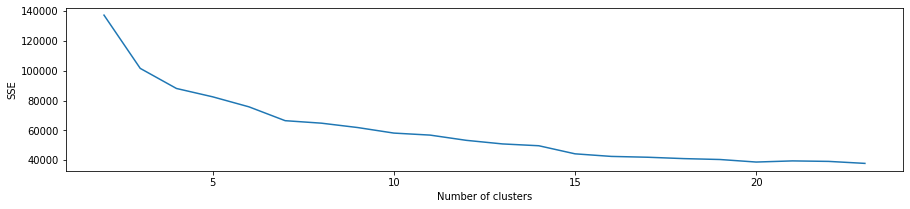

In [46]:
# import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [47]:
# plt.rcParams["figure.figsize"] = (15,3)
# plt.figure()
# sse_to_10 = { k: v for k, v in sse.items() if k <= 10 }  # zoom in
# plt.plot(list(sse_to_10.keys()), list(sse_to_10.values()))
# plt.xlabel("Number of clusters")
# plt.ylabel("SSE")
# plt.show()

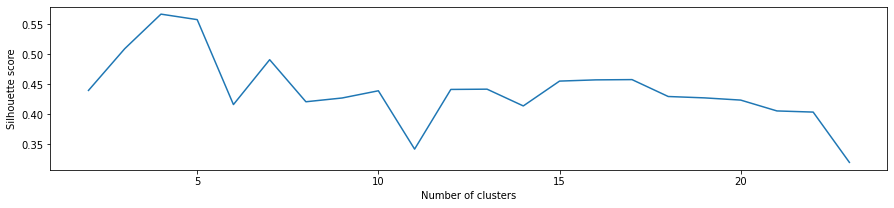

In [48]:
plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

## Interpretation

Parallel coordinates plots.

In [90]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

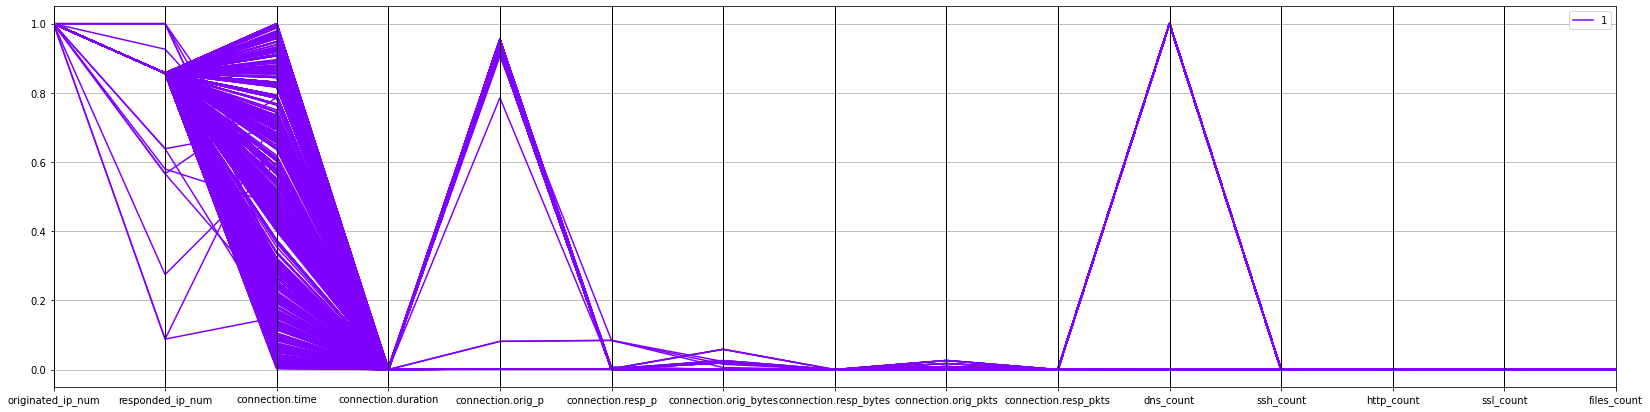

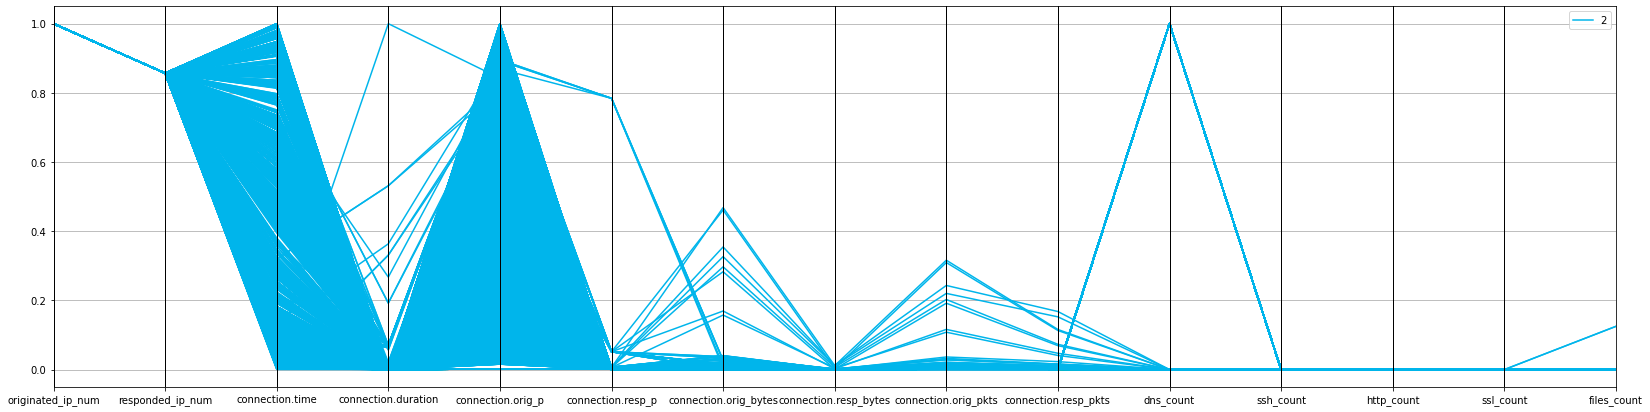

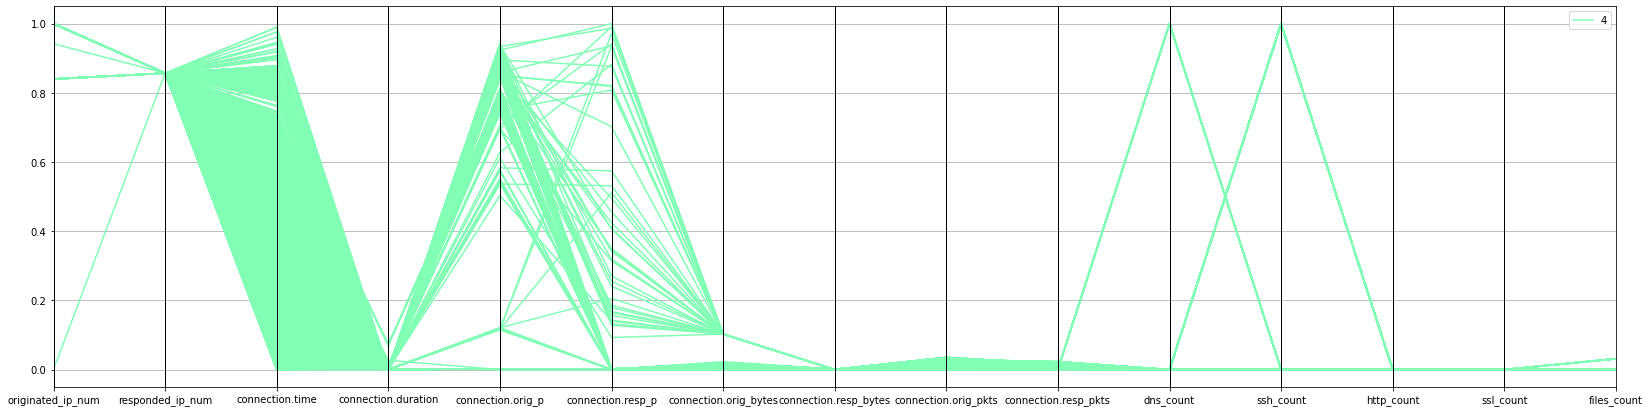

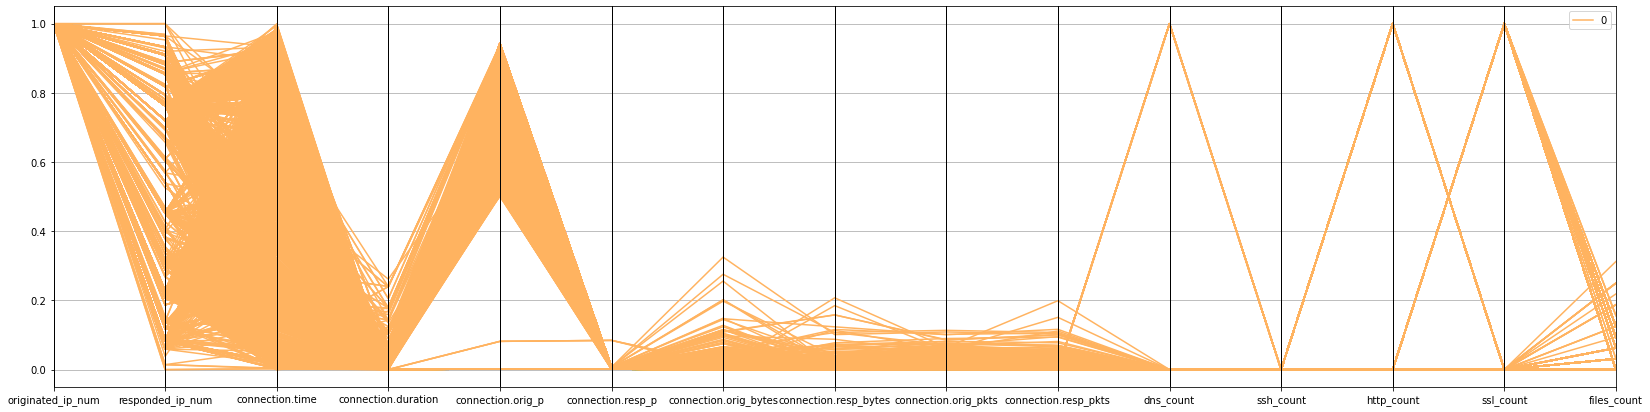

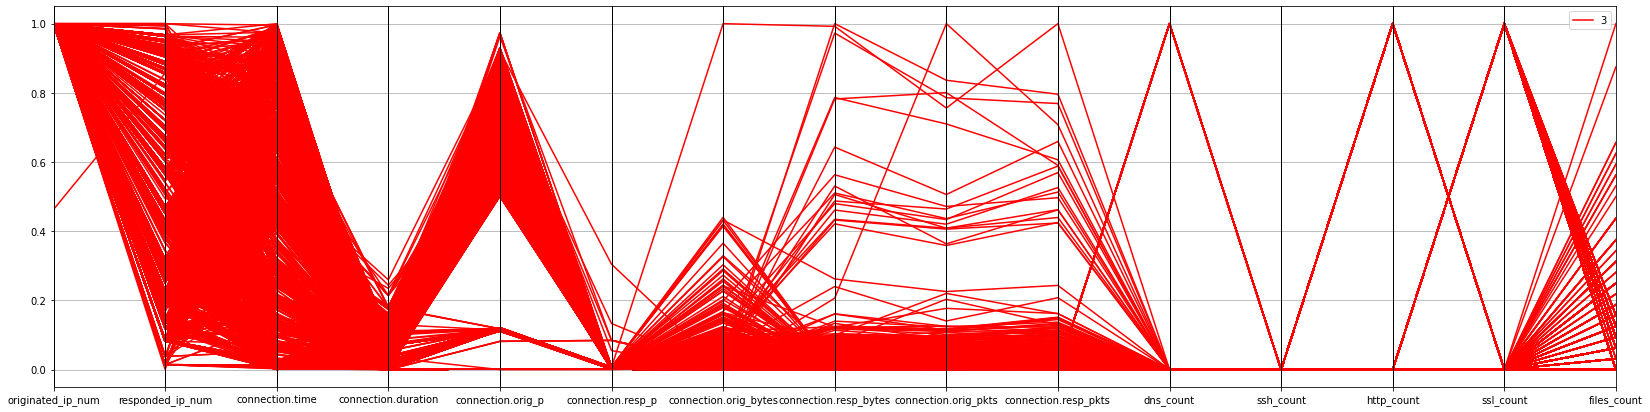

In [91]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

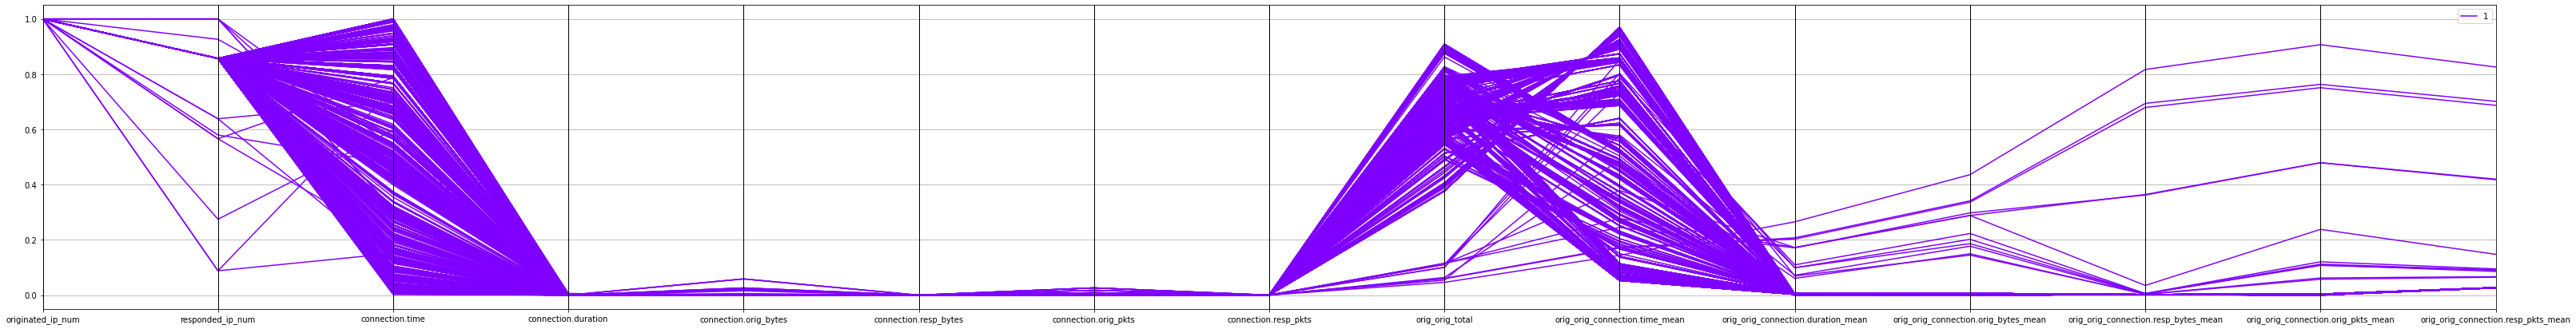

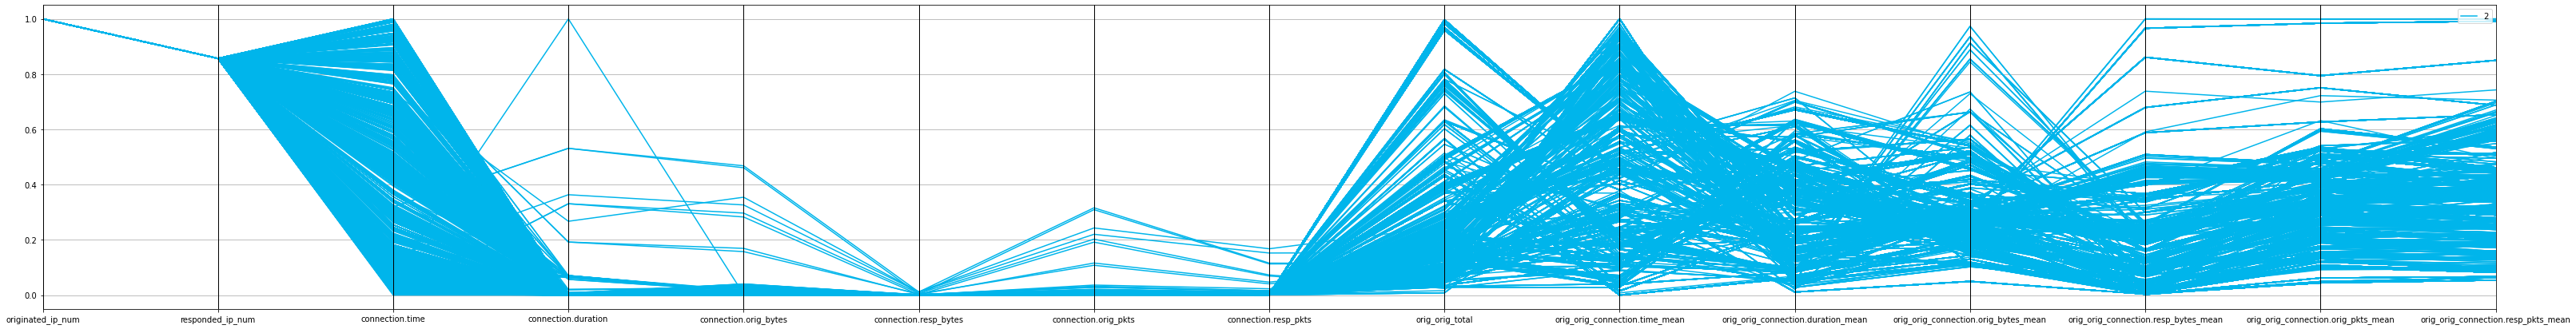

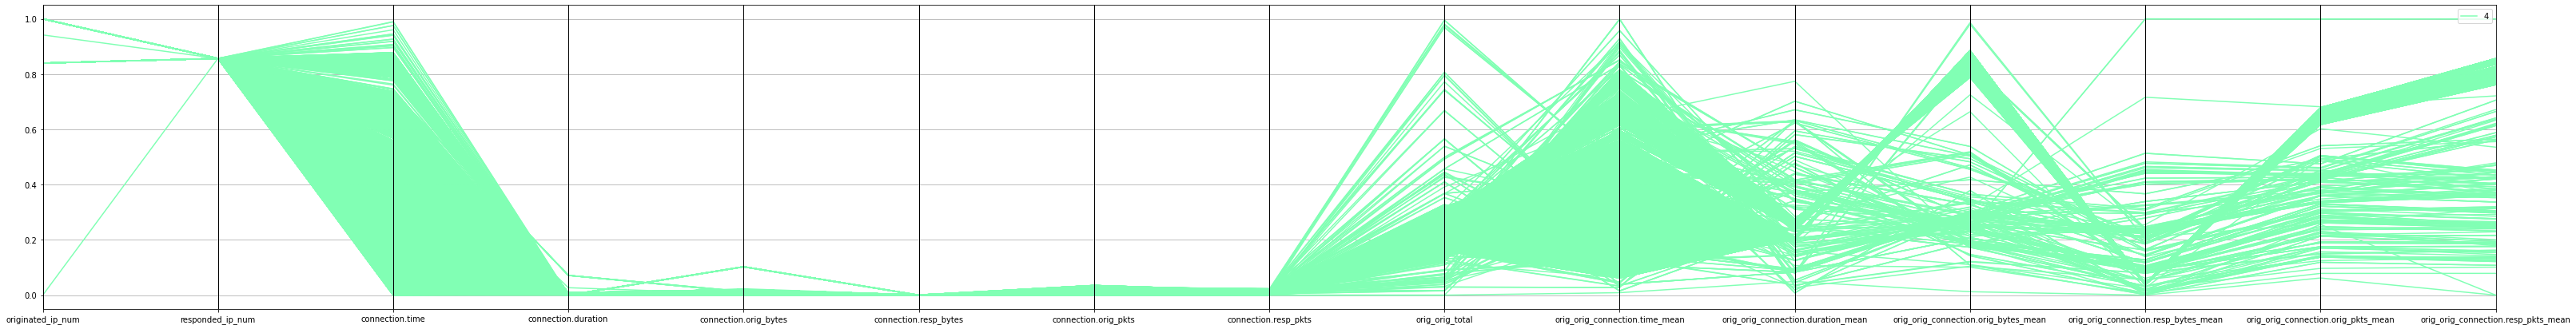

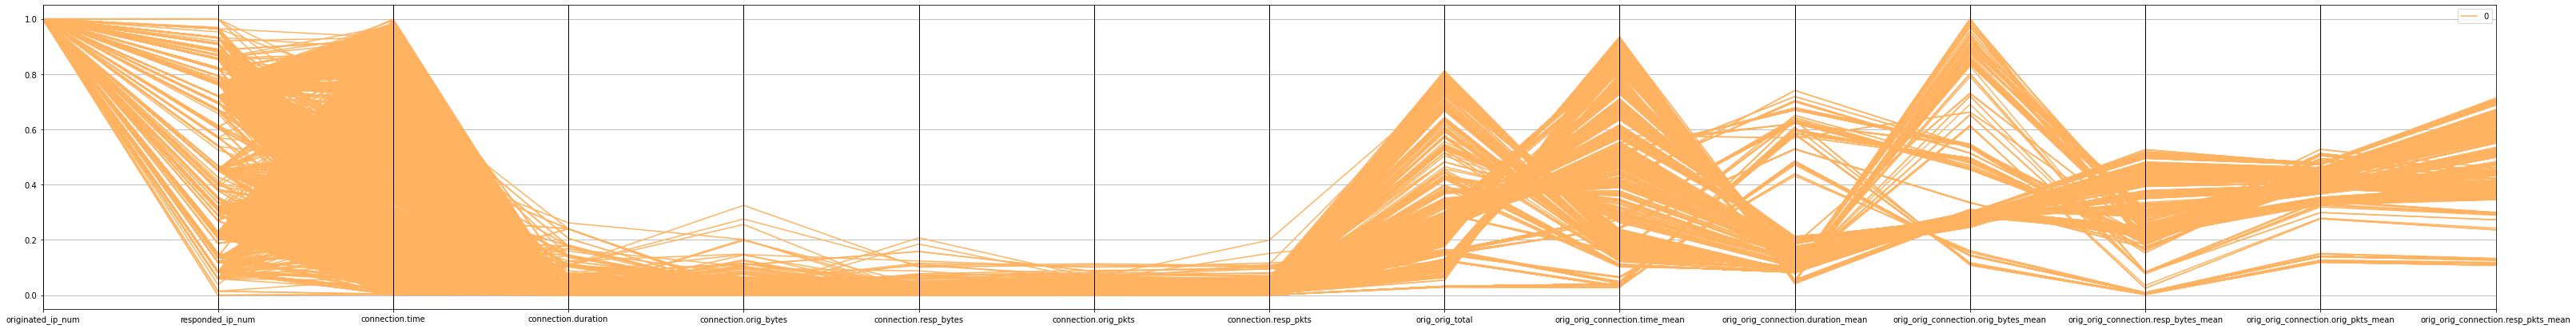

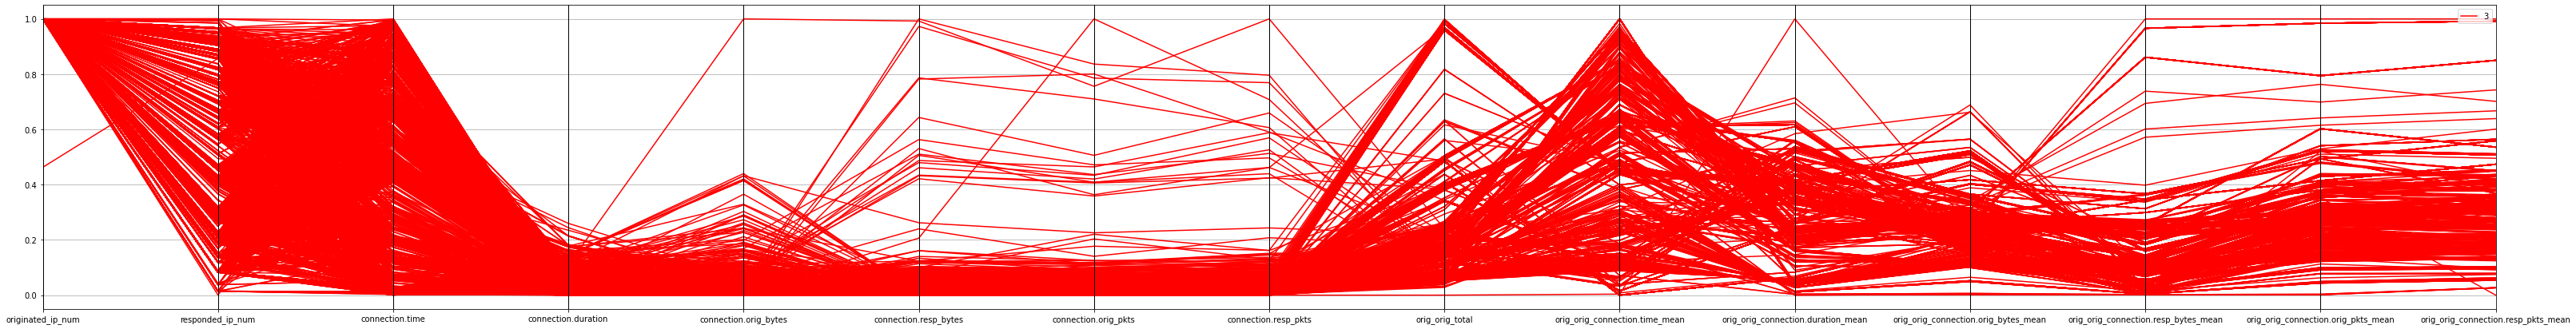

In [92]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()